***Classification model to predict price range of mobile based on certain specifications ***

We import the required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import classification_report

Read the data set and save as "mobileData"

In [2]:
mobileData=pd.read_csv('mobile_data.csv')

In [3]:
mobileData

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
mobileData.shape

(2000, 21)

In [5]:
mobileData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

There are no null values

In [6]:
mobileData.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [7]:
mobileData['price_range'].unique()

array([1, 2, 3, 0])

In [8]:
mobileData.corr()['price_range']

battery_power    0.200723
blue             0.020573
clock_speed     -0.006606
dual_sim         0.017444
fc               0.021998
four_g           0.014772
int_memory       0.044435
m_dep            0.000853
mobile_wt       -0.030302
n_cores          0.004399
pc               0.033599
px_height        0.148858
px_width         0.165818
ram              0.917046
sc_h             0.022986
sc_w             0.038711
talk_time        0.021859
three_g          0.023611
touch_screen    -0.030411
wifi             0.018785
price_range      1.000000
Name: price_range, dtype: float64

# **SPLITTING**

Data is split into train and test data sets

In [9]:
mobileData1=mobileData.drop(columns=['price_range'])
X=mobileData1.values
y=mobileData['price_range'].values

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=9)

In [11]:
X_train.shape,X_test.shape

((1600, 20), (400, 20))

In [12]:
X_train

array([[1.836e+03, 0.000e+00, 1.100e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [1.783e+03, 0.000e+00, 2.900e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [1.745e+03, 0.000e+00, 1.500e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       ...,
       [9.550e+02, 0.000e+00, 5.000e-01, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [8.690e+02, 1.000e+00, 1.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [1.809e+03, 1.000e+00, 1.700e+00, ..., 1.000e+00, 0.000e+00,
        1.000e+00]])

In [13]:
y_train

array([2, 1, 3, ..., 1, 2, 2])

In [14]:
scaler=StandardScaler()
X_train_scale=scaler.fit_transform(X_train)
X_test_scale=scaler.transform(X_test)

# **Logistic Regression**

We apply Logistic Regression on train dataset and predicted values for the test data set

In [15]:
lr=LogisticRegression()
lr.fit(X_train_scale,y_train)

LogisticRegression()

In [16]:
lr_pred=lr.predict(X_test_scale)
lr_pred

array([1, 0, 1, 3, 2, 2, 0, 0, 2, 3, 1, 0, 1, 0, 2, 1, 2, 2, 0, 3, 3, 1,
       0, 2, 2, 2, 1, 3, 0, 1, 1, 1, 0, 1, 0, 1, 3, 1, 3, 3, 3, 3, 0, 0,
       0, 2, 0, 3, 2, 3, 0, 2, 3, 3, 1, 0, 2, 2, 2, 3, 0, 1, 0, 0, 1, 1,
       2, 3, 0, 0, 1, 3, 3, 3, 0, 1, 3, 2, 1, 0, 2, 0, 0, 1, 3, 0, 2, 0,
       3, 0, 1, 1, 0, 3, 2, 3, 3, 1, 3, 3, 1, 1, 0, 0, 0, 3, 2, 3, 1, 2,
       3, 2, 0, 1, 3, 0, 3, 2, 1, 0, 2, 2, 2, 3, 2, 2, 1, 2, 1, 3, 3, 1,
       2, 0, 3, 0, 2, 0, 2, 1, 3, 3, 3, 2, 3, 0, 3, 0, 2, 2, 0, 3, 3, 1,
       0, 1, 2, 3, 3, 3, 2, 1, 0, 3, 3, 2, 2, 1, 0, 2, 1, 2, 2, 2, 3, 1,
       3, 3, 2, 2, 0, 0, 0, 2, 1, 2, 0, 3, 3, 2, 1, 1, 0, 1, 3, 2, 1, 0,
       3, 3, 1, 2, 1, 2, 0, 3, 2, 3, 0, 1, 0, 0, 3, 3, 0, 1, 2, 0, 2, 0,
       0, 3, 3, 2, 0, 3, 0, 0, 0, 3, 1, 1, 3, 1, 2, 2, 1, 1, 3, 1, 0, 2,
       0, 0, 1, 1, 3, 3, 0, 1, 1, 3, 0, 3, 1, 2, 3, 2, 1, 1, 2, 0, 1, 0,
       2, 1, 1, 0, 0, 0, 1, 2, 1, 0, 1, 1, 0, 2, 3, 2, 1, 0, 0, 2, 3, 3,
       1, 1, 3, 1, 0, 0, 3, 3, 1, 1, 1, 0, 0, 3, 0,

In [17]:
lr_score=accuracy_score(lr_pred,y_test)
print('Logistic Regression Accuracy',lr_score)
print('Logistic Regression Confusion Matrix\n',confusion_matrix(lr_pred,y_test))
print('Logistic Regression Classification Report\n',classification_report(lr_pred,y_test))

Logistic Regression Accuracy 0.955
Logistic Regression Confusion Matrix
 [[101   4   0   0]
 [  5  92   2   0]
 [  0   1  93   3]
 [  0   0   3  96]]
Logistic Regression Classification Report
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       105
           1       0.95      0.93      0.94        99
           2       0.95      0.96      0.95        97
           3       0.97      0.97      0.97        99

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



# **KNN**

We apply KNN on train dataset and predicted values for the test data set

In [18]:
from sklearn import neighbors
knn=KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train_scale,y_train)
knn_pred=knn.predict(X_test_scale)
knn_pred

array([0, 1, 2, 3, 2, 1, 0, 0, 2, 3, 0, 0, 0, 0, 2, 1, 0, 2, 0, 3, 3, 1,
       0, 2, 1, 1, 0, 3, 0, 1, 0, 2, 0, 0, 0, 0, 3, 2, 3, 3, 3, 3, 0, 1,
       0, 1, 0, 3, 3, 3, 0, 2, 3, 3, 1, 0, 2, 0, 2, 3, 0, 0, 1, 1, 1, 2,
       2, 2, 0, 0, 0, 3, 3, 2, 0, 0, 2, 1, 0, 1, 1, 0, 0, 1, 3, 0, 3, 0,
       3, 0, 1, 2, 0, 3, 2, 3, 2, 1, 3, 3, 2, 2, 2, 0, 0, 3, 2, 3, 0, 0,
       2, 3, 0, 1, 3, 0, 2, 2, 1, 0, 2, 1, 3, 3, 2, 0, 2, 2, 2, 3, 3, 1,
       2, 0, 3, 1, 2, 1, 2, 0, 2, 3, 3, 3, 3, 1, 2, 0, 2, 2, 0, 3, 2, 1,
       0, 2, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 3, 1, 0, 1, 1, 2, 1, 3, 3, 1,
       2, 3, 2, 2, 0, 0, 0, 2, 1, 2, 1, 3, 3, 1, 1, 2, 0, 2, 3, 2, 2, 1,
       3, 2, 1, 2, 0, 3, 0, 3, 2, 2, 0, 1, 0, 0, 2, 3, 0, 1, 2, 1, 2, 0,
       0, 3, 3, 1, 0, 3, 0, 0, 1, 3, 2, 1, 3, 0, 2, 2, 0, 2, 2, 1, 0, 2,
       0, 0, 0, 1, 3, 1, 0, 0, 1, 3, 1, 3, 1, 3, 3, 2, 0, 1, 3, 1, 2, 0,
       2, 1, 3, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 3, 3, 1, 1, 1, 0, 1, 3, 3,
       0, 1, 3, 1, 0, 1, 3, 3, 1, 0, 1, 0, 0, 3, 0,

In [19]:
knn_score=accuracy_score(knn_pred,y_test)
print('KNN Accuracy',knn_score)
print('KNN Confusion Matrix\n',confusion_matrix(knn_pred,y_test))
print('KNN Classification Report\n',classification_report(knn_pred,y_test))

KNN Accuracy 0.615
KNN Confusion Matrix
 [[85 30  5  0]
 [19 40 24  3]
 [ 2 24 50 25]
 [ 0  3 19 71]]
KNN Classification Report
               precision    recall  f1-score   support

           0       0.80      0.71      0.75       120
           1       0.41      0.47      0.44        86
           2       0.51      0.50      0.50       101
           3       0.72      0.76      0.74        93

    accuracy                           0.61       400
   macro avg       0.61      0.61      0.61       400
weighted avg       0.62      0.61      0.62       400



# **SVM** kernel=linear

We apply SVM Classifier with kernel linear on train dataset and predicted values for the test data set

In [20]:
svm_lr=svm.SVC(kernel='linear')
svm_lr.fit(X_train_scale,y_train)
svmlr_pred=svm_lr.predict(X_test_scale)
svmlr_pred

array([1, 0, 1, 3, 2, 2, 0, 0, 2, 3, 1, 0, 1, 0, 2, 1, 2, 2, 0, 3, 3, 1,
       0, 2, 2, 2, 1, 3, 0, 1, 1, 1, 0, 1, 0, 1, 3, 1, 3, 3, 3, 3, 0, 0,
       0, 2, 0, 3, 2, 3, 0, 2, 3, 3, 1, 0, 2, 2, 3, 3, 0, 1, 0, 0, 1, 1,
       2, 3, 0, 0, 1, 3, 3, 3, 0, 1, 3, 2, 1, 0, 2, 0, 0, 1, 3, 0, 2, 0,
       3, 0, 1, 1, 0, 3, 1, 3, 3, 1, 3, 3, 1, 1, 0, 0, 0, 2, 2, 3, 1, 2,
       3, 1, 0, 1, 3, 0, 3, 2, 1, 0, 2, 2, 2, 3, 2, 2, 1, 2, 1, 3, 3, 1,
       2, 0, 3, 0, 2, 0, 2, 1, 3, 3, 3, 2, 3, 0, 3, 0, 2, 2, 0, 3, 3, 1,
       0, 1, 2, 3, 3, 3, 2, 1, 0, 3, 3, 2, 2, 1, 0, 2, 1, 2, 2, 1, 3, 1,
       3, 3, 2, 1, 0, 0, 0, 2, 1, 2, 0, 3, 3, 2, 1, 1, 0, 1, 3, 2, 1, 0,
       3, 3, 1, 2, 1, 2, 0, 3, 2, 3, 0, 1, 0, 0, 3, 3, 0, 1, 2, 0, 2, 0,
       0, 3, 3, 2, 0, 3, 0, 0, 0, 3, 1, 1, 3, 1, 2, 2, 1, 1, 3, 1, 0, 2,
       0, 0, 0, 1, 3, 3, 0, 1, 1, 3, 0, 3, 1, 2, 3, 2, 1, 1, 2, 0, 1, 0,
       2, 1, 1, 0, 0, 0, 1, 2, 1, 0, 1, 1, 0, 2, 3, 2, 1, 0, 0, 2, 3, 3,
       1, 1, 3, 1, 0, 0, 3, 3, 1, 1, 1, 0, 0, 3, 0,

In [21]:
svmlr_score=accuracy_score(svmlr_pred,y_test)
print('SVC_linear Accuracy',svmlr_score)
print('SVC_linear confusion_matrix\n',confusion_matrix(svmlr_pred,y_test))
print('SVC_linear classification_report\n', classification_report(svmlr_pred,y_test))


SVC_linear Accuracy 0.95
SVC_linear confusion_matrix
 [[102   4   0   0]
 [  4  92   5   0]
 [  0   1  90   3]
 [  0   0   3  96]]
SVC_linear classification_report
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       106
           1       0.95      0.91      0.93       101
           2       0.92      0.96      0.94        94
           3       0.97      0.97      0.97        99

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



# **SVM kernel=rbf**

We apply SVM Classifier with kernel rbf on train dataset and predicted values for the test data set

In [22]:
svm_rbf=svm.SVC(kernel='rbf')
svm_rbf.fit(X_train_scale,y_train)
svmrbf_pred=svm_rbf.predict(X_test_scale)


In [23]:
svmrbf_score=accuracy_score(svmrbf_pred,y_test)
print('SVC kernel=rbf',svmrbf_score)
print('SVC_rbf confusion_matrix\n',confusion_matrix(svmrbf_pred,y_test))
print('SVC_rbf classification_report\n',classification_report(svmrbf_pred,y_test))

SVC kernel=rbf 0.84
SVC_rbf confusion_matrix
 [[93 10  0  0]
 [13 75 15  0]
 [ 0 12 78  9]
 [ 0  0  5 90]]
SVC_rbf classification_report
               precision    recall  f1-score   support

           0       0.88      0.90      0.89       103
           1       0.77      0.73      0.75       103
           2       0.80      0.79      0.79        99
           3       0.91      0.95      0.93        95

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400



# **Best Model selection based on accuracy**






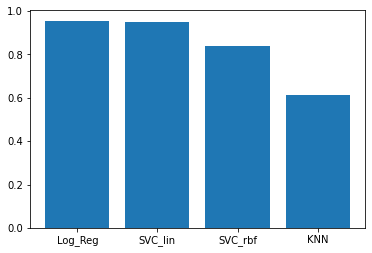

In [24]:
Scores=[lr_score,svmlr_score,svmrbf_score,knn_score]
plt.bar(['Log_Reg','SVC_lin','SVC_rbf','KNN'],Scores)
plt.show()

***THE MODEL WITH THE BEST ACCURACY IS LOGISTIC REGRESSION ***